In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

In [296]:
df=pd.read_csv('mcdonalds.csv')

In [298]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [300]:
df.shape

(1453, 15)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [304]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [306]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1448    False
1449    False
1450    False
1451    False
1452    False
Length: 1453, dtype: bool

In [308]:
df.duplicated().sum()

22

In [310]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [312]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

<Axes: ylabel='count'>

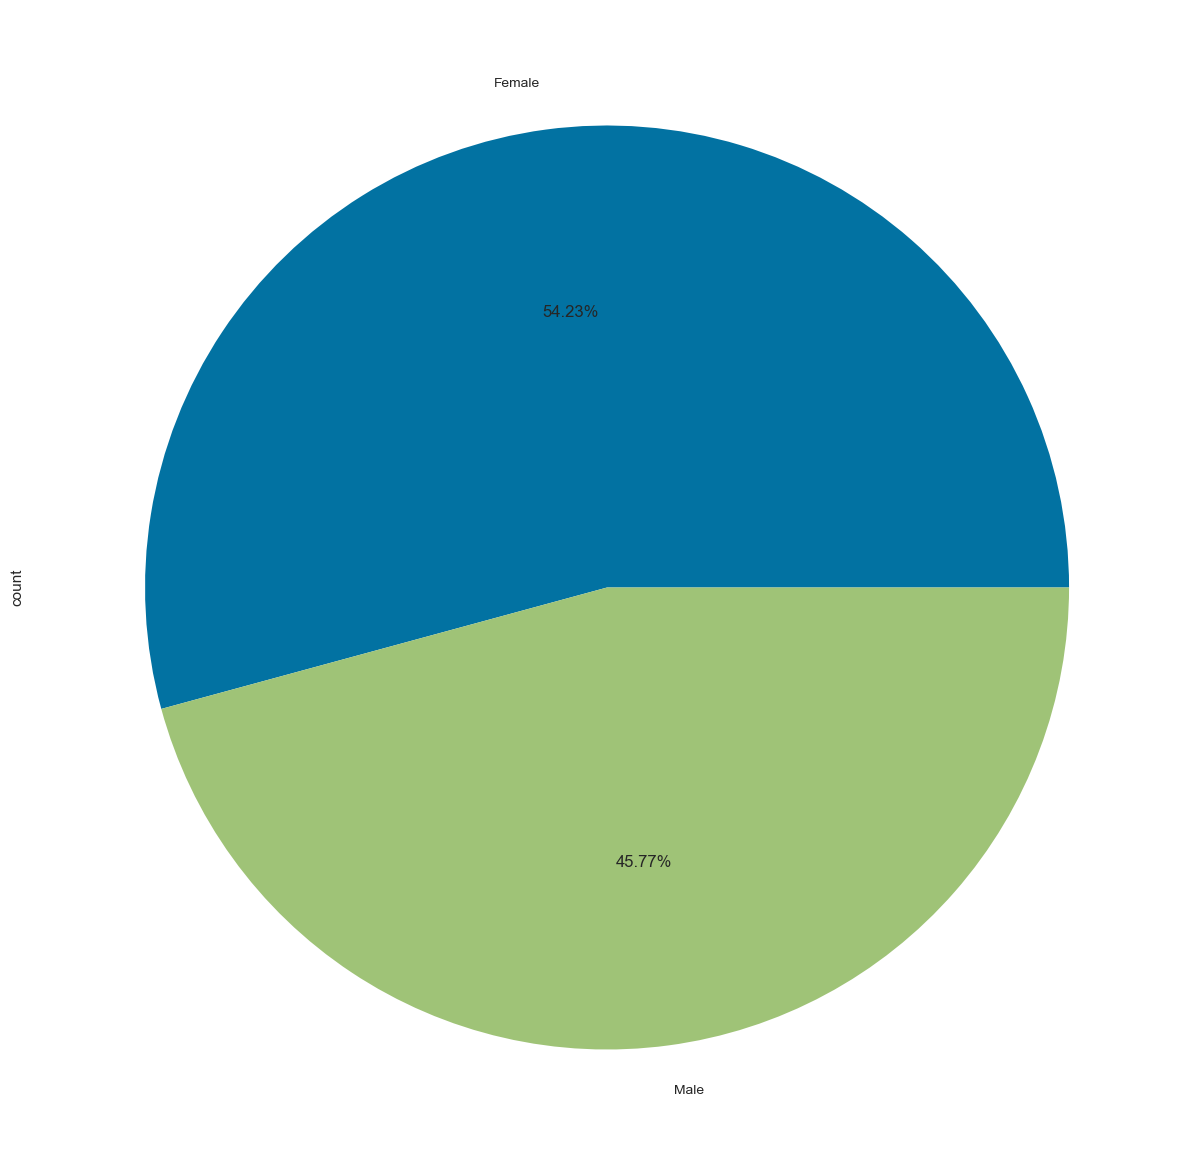

In [314]:
df['Gender'].value_counts().plot(kind='pie',autopct = '%.2f%%')

<Axes: xlabel='Like'>

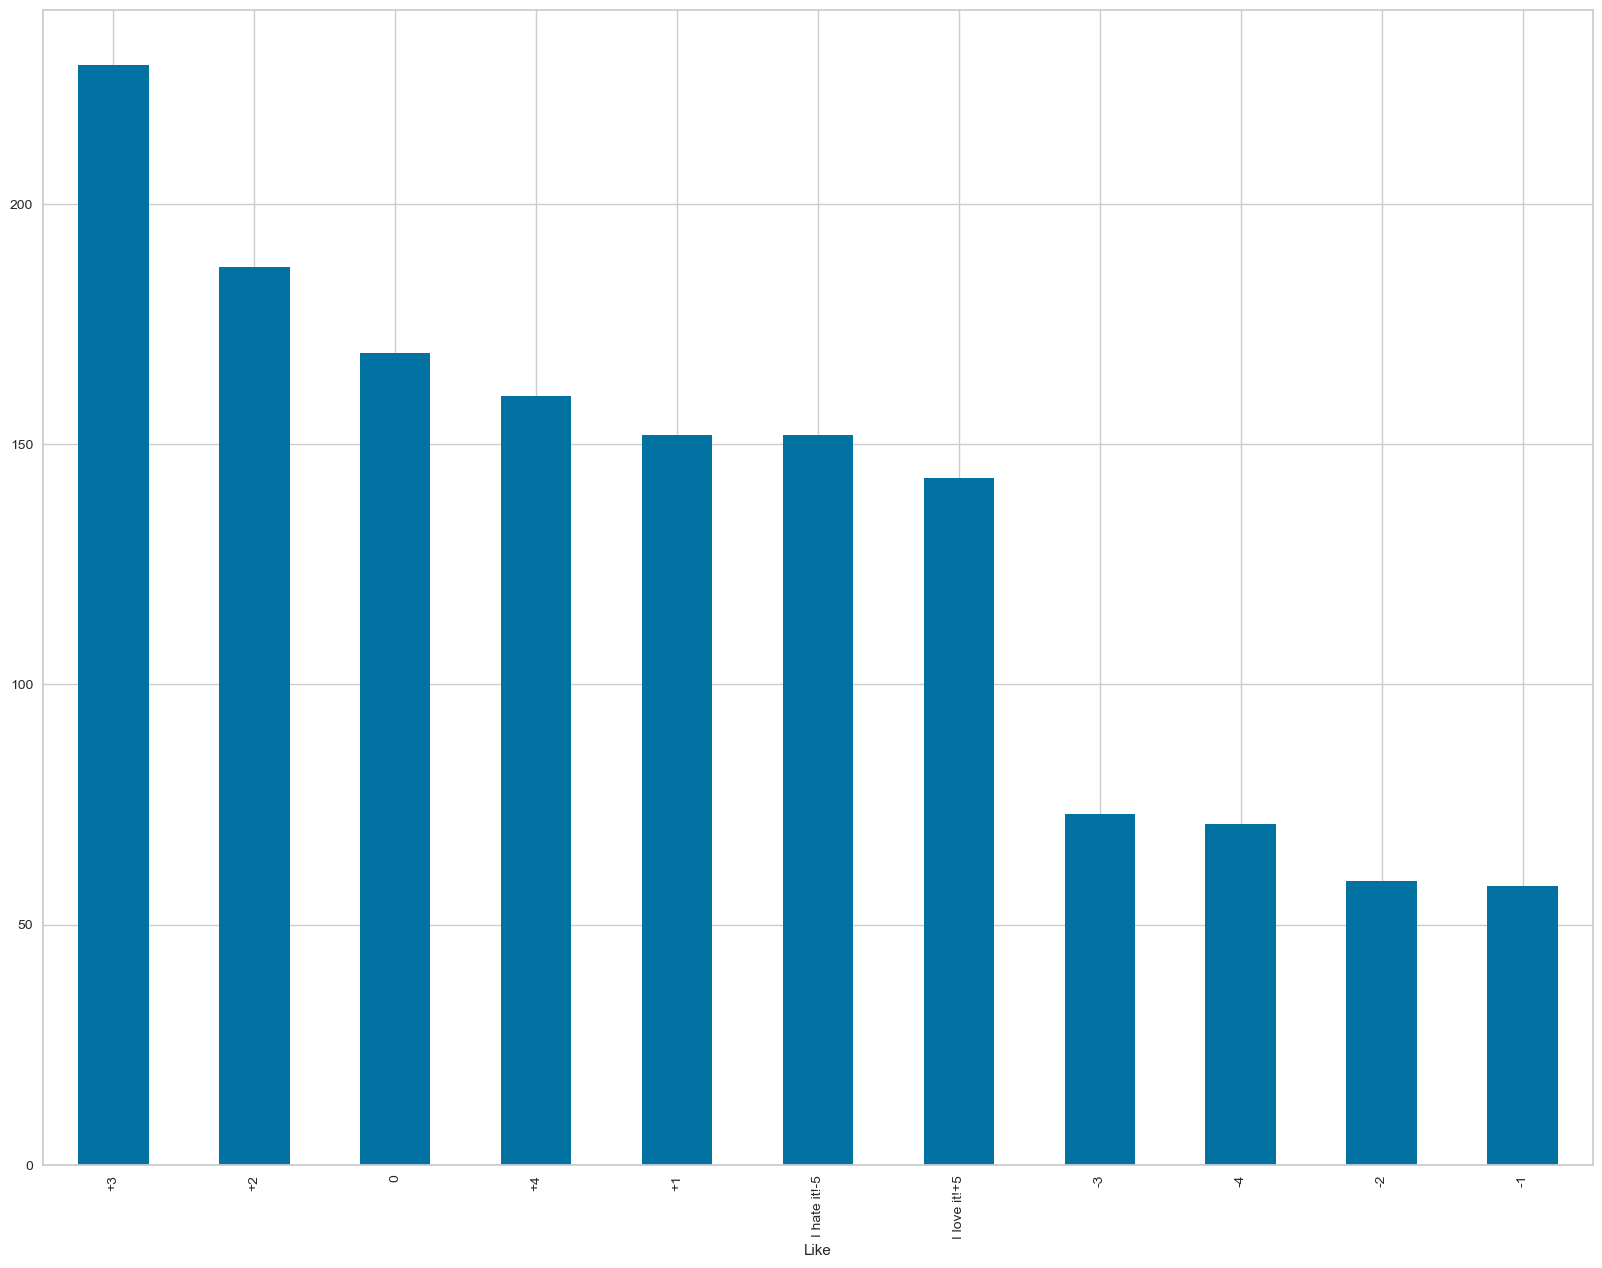

In [316]:
df['Like'].value_counts().plot(kind='bar')

In [318]:
df['healthy'].unique()

array(['No', 'Yes'], dtype=object)

In [320]:
df['yummy'].value_counts()

yummy
Yes    803
No     650
Name: count, dtype: int64

In [322]:
df['convenient'].value_counts()

convenient
Yes    1319
No      134
Name: count, dtype: int64

<Axes: xlabel='spicy'>

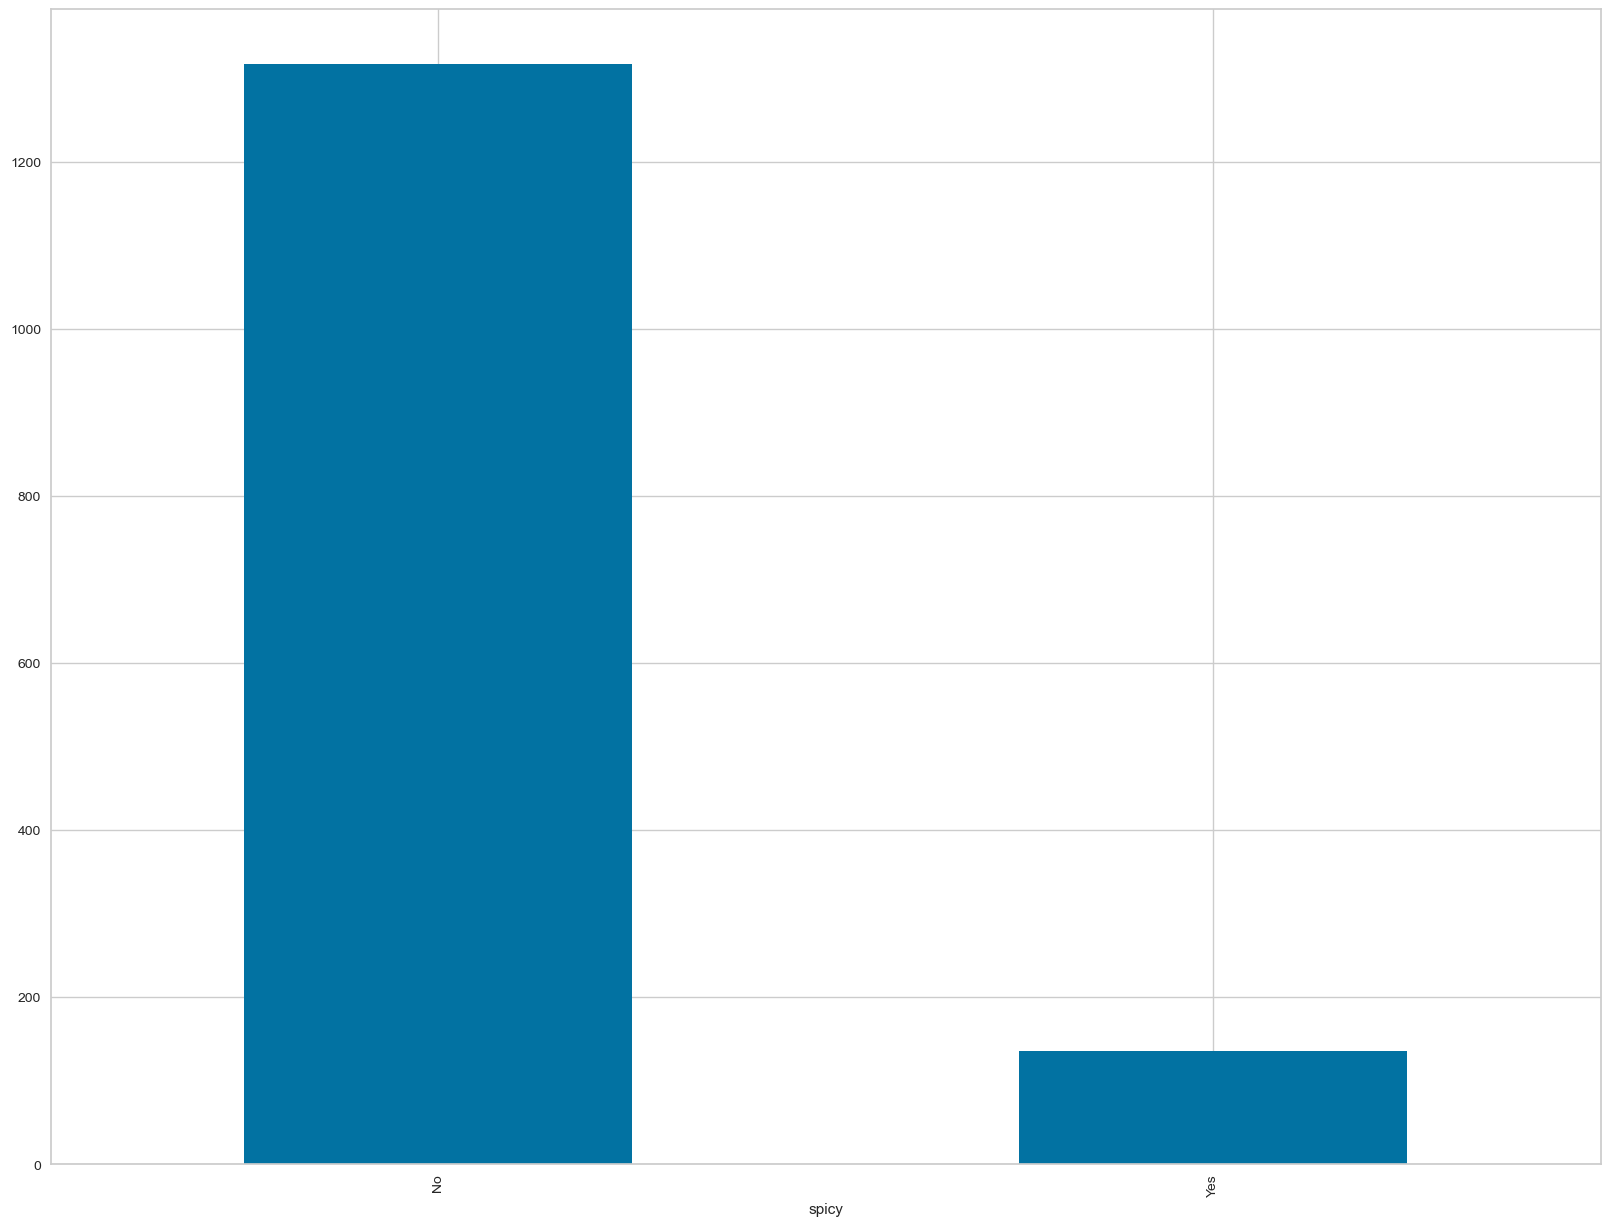

In [324]:
df['spicy'].value_counts().plot(kind='bar')

In [326]:
df['fattening'].value_counts()

fattening
Yes    1260
No      193
Name: count, dtype: int64

<Axes: ylabel='count'>

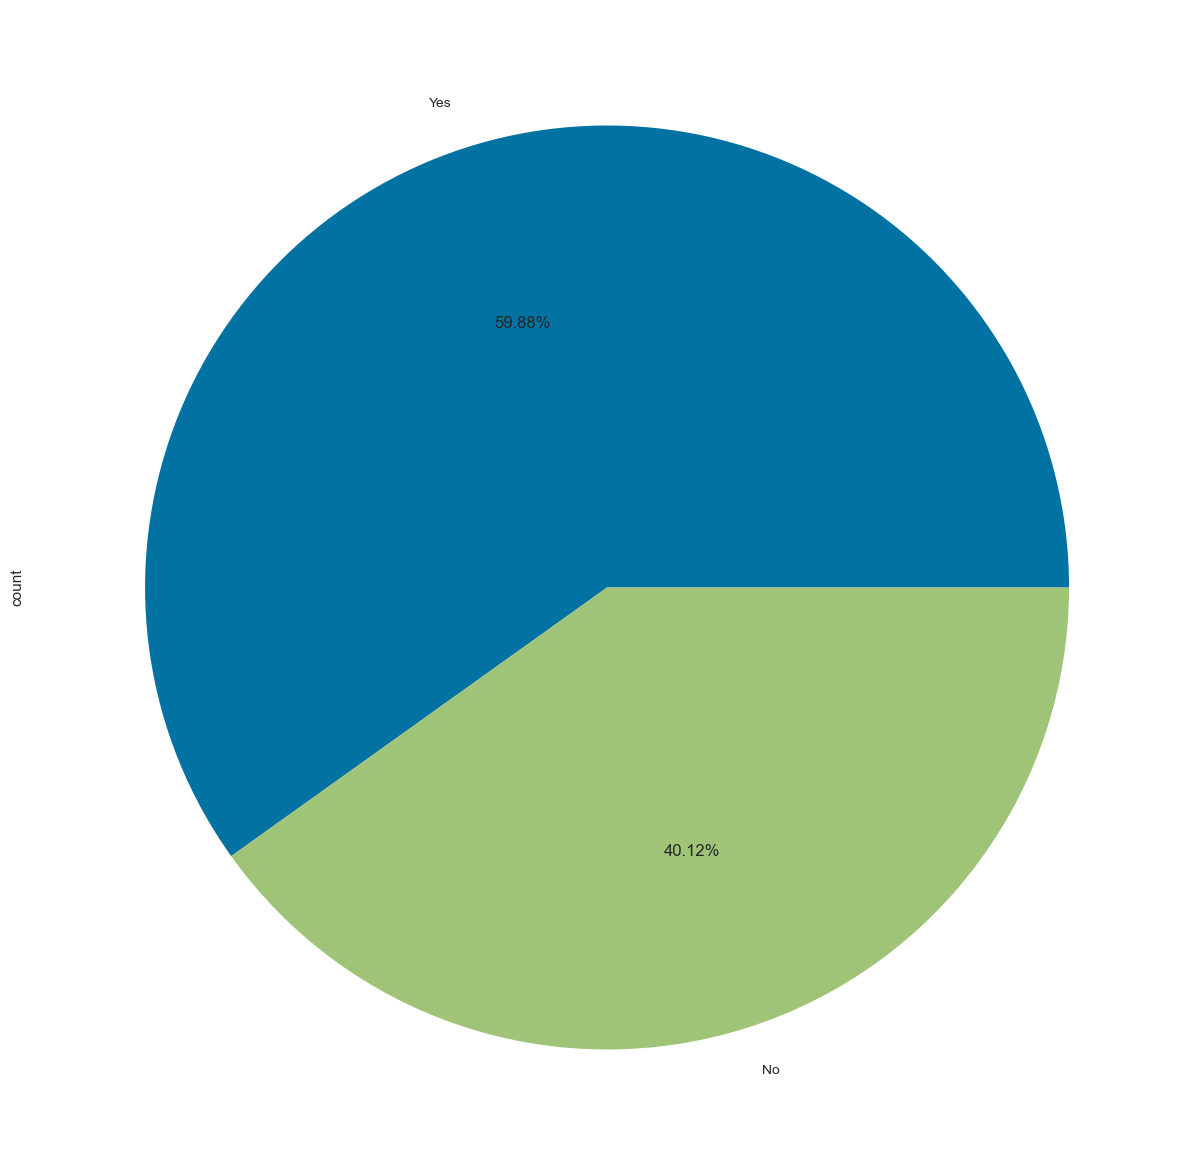

In [328]:
df['cheap'].value_counts().plot(kind='pie',autopct = '%.2f%%')

<Axes: ylabel='count'>

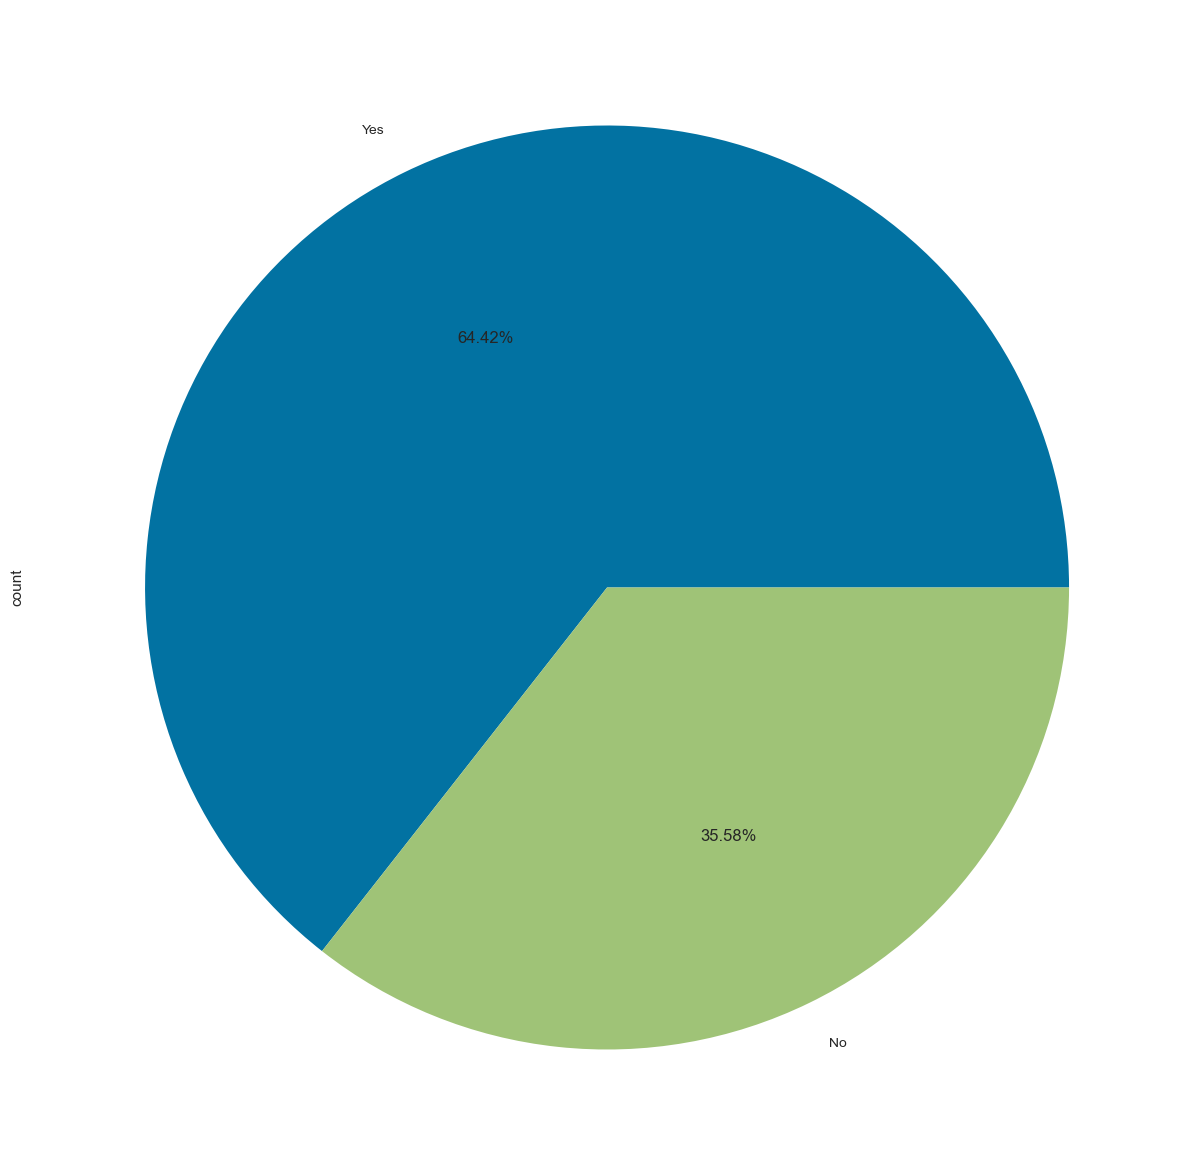

In [329]:
df['tasty'].value_counts().plot(kind='pie',autopct = '%.2f%%')

In [331]:
df['tasty'].value_counts()

tasty
Yes    936
No     517
Name: count, dtype: int64

<Axes: xlabel='expensive'>

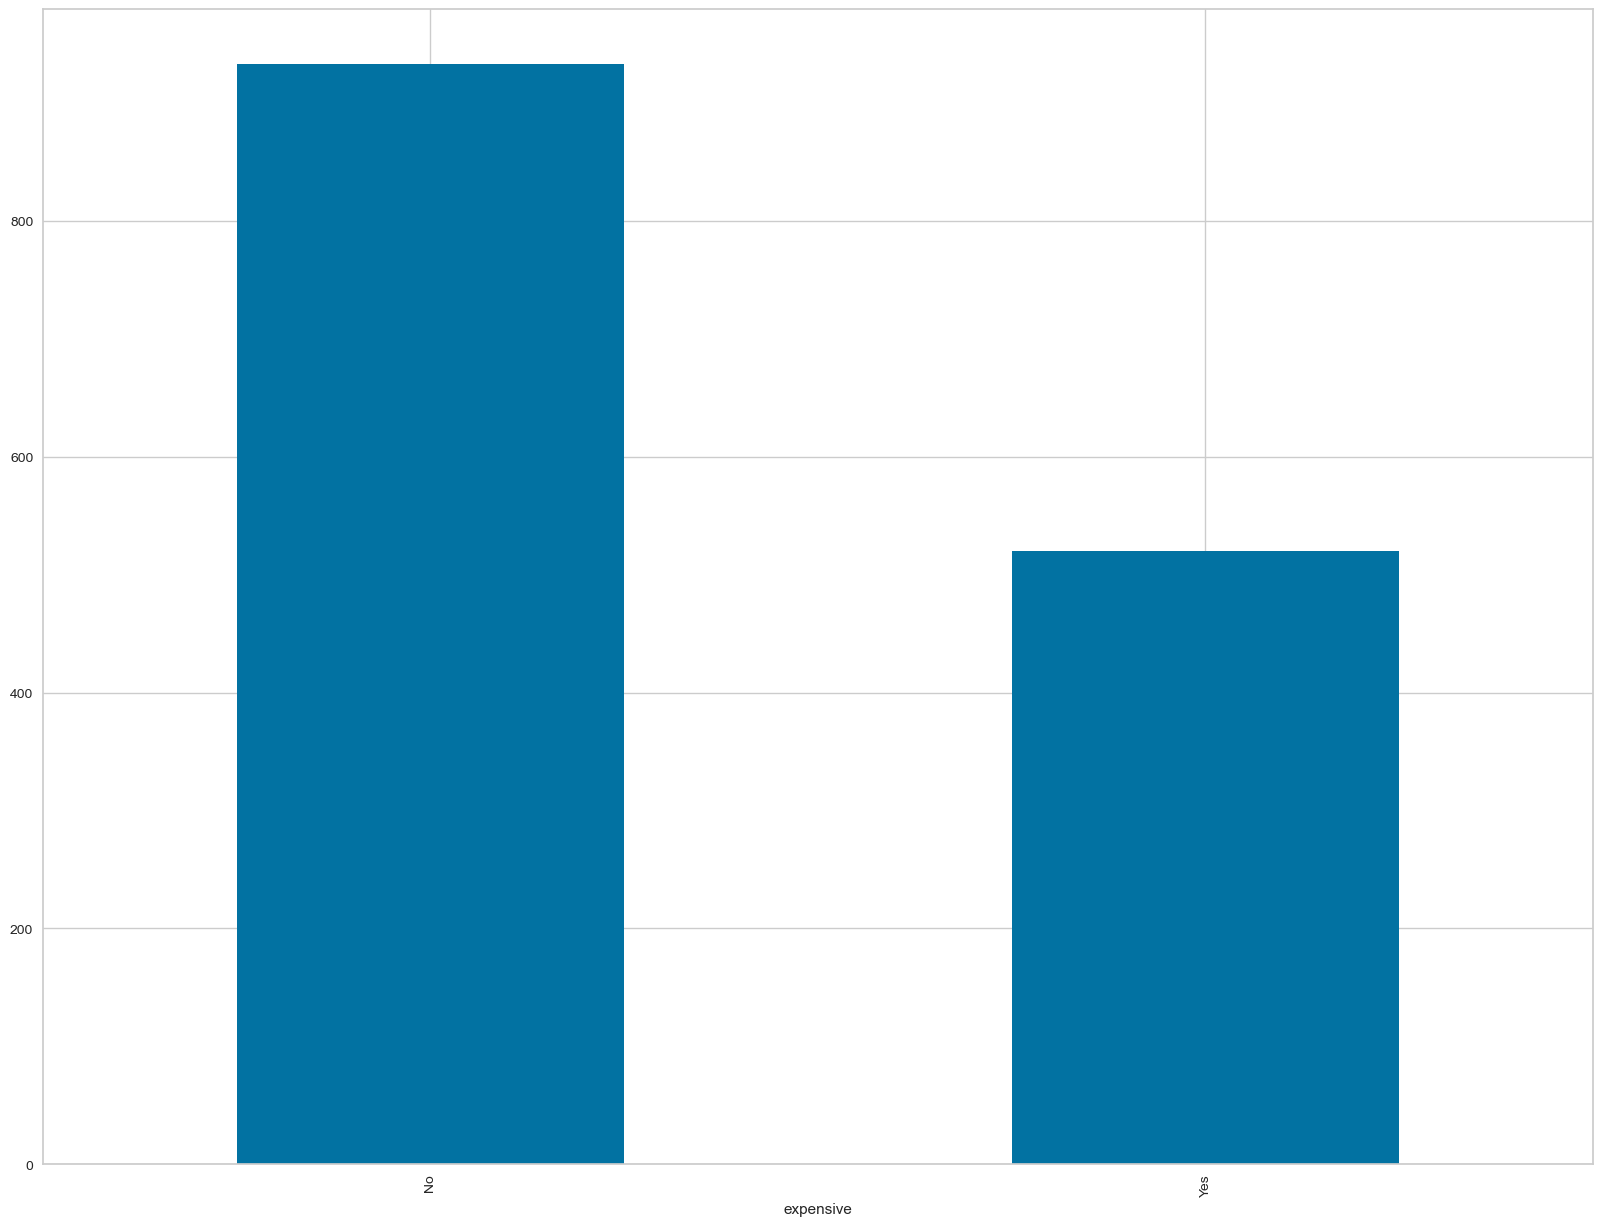

In [333]:
df['expensive'].value_counts().plot(kind='bar')

ValueError: could not convert string to float: 'No'

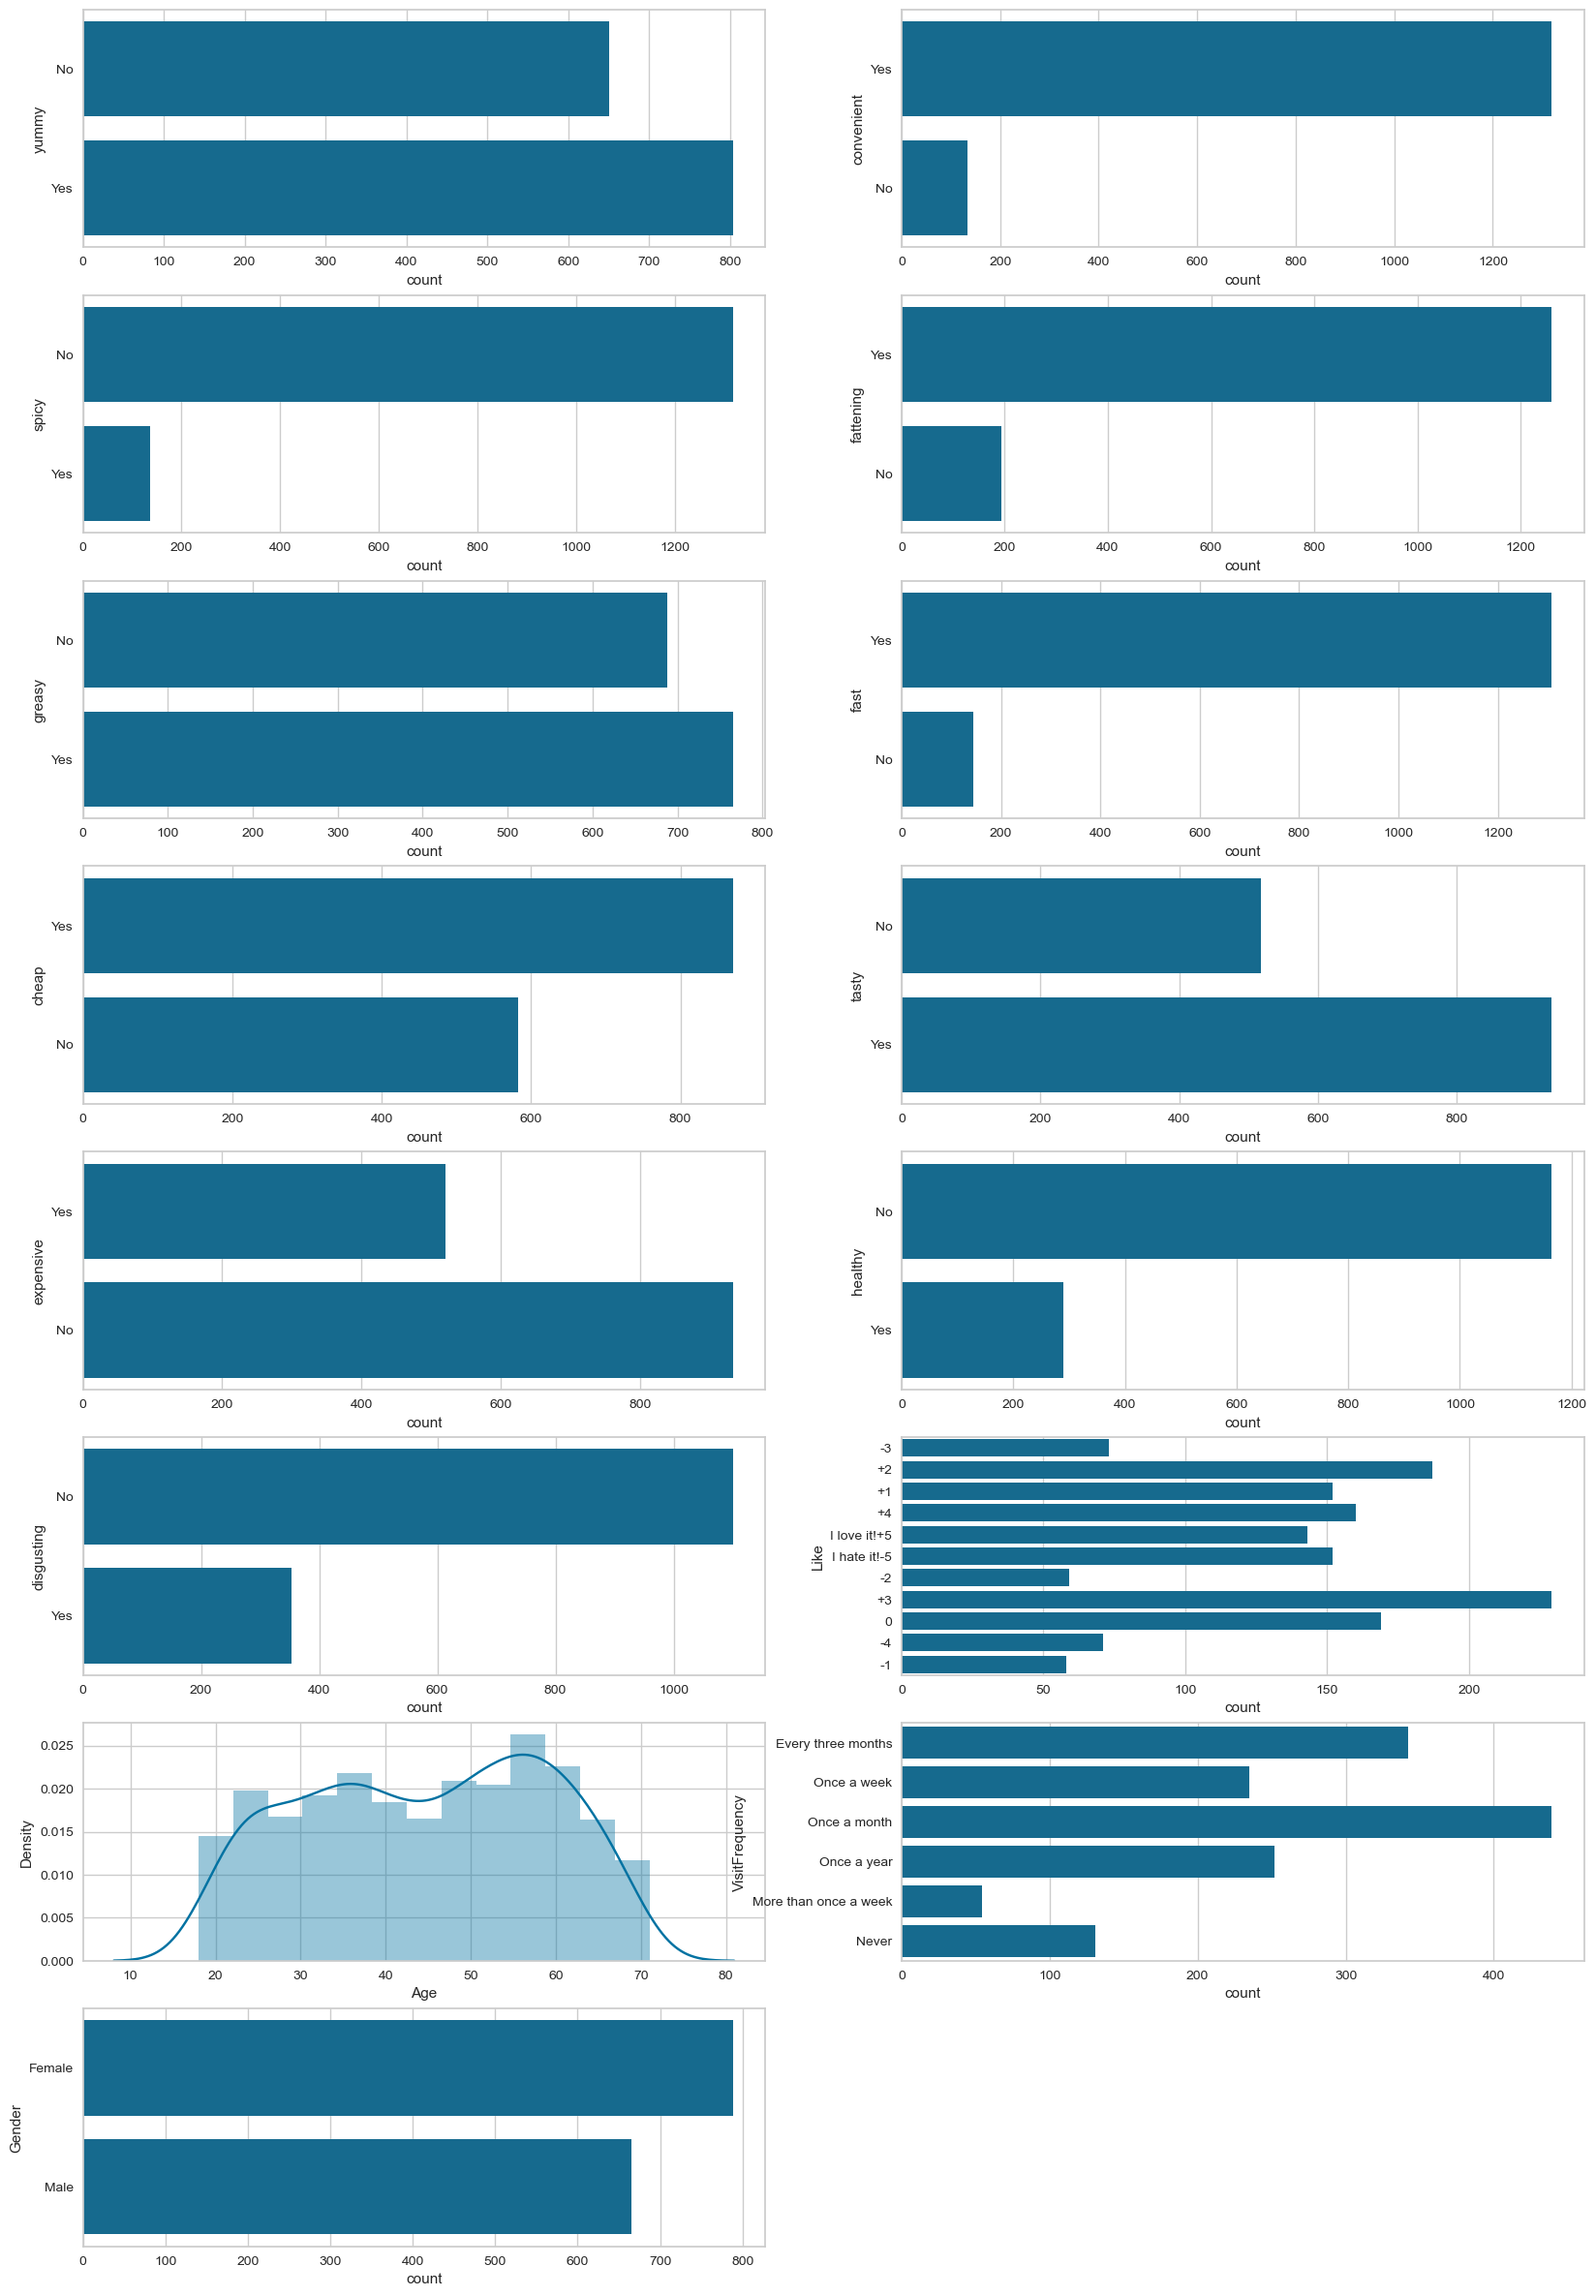

In [335]:
def EDA(df,figuresize):
    cat = []  #categorical
    con = []  # continus
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())


EDA(df, (20, 30))

In [ ]:
ab=df.groupby(['Gender','Age']).agg({'Like':'max','VisitFrequency':'max','Age':'mean'})

In [338]:
ab

Like VisitFrequency   Age
Gender Age                                   
Female 18   I love it!+5    Once a year  18.0
       19   I love it!+5    Once a week  19.0
       20   I love it!+5    Once a year  20.0
       21   I love it!+5    Once a week  21.0
       22   I love it!+5    Once a week  22.0
...                  ...            ...   ...
Male   67   I hate it!-5    Once a year  67.0
       68   I love it!+5    Once a year  68.0
       69   I hate it!-5    Once a week  69.0
       70   I love it!+5    Once a year  70.0
       71             +4   Once a month  71.0

[107 rows x 3 columns]

In [340]:
bc=df.groupby('VisitFrequency').agg({'Age':'mean'})

In [342]:
bc

,Age
VisitFrequency,
Every three months,46.666667
More than once a week,37.944444
Never,51.167939
Once a month,42.305239
Once a week,38.753191
Once a year,49.285714


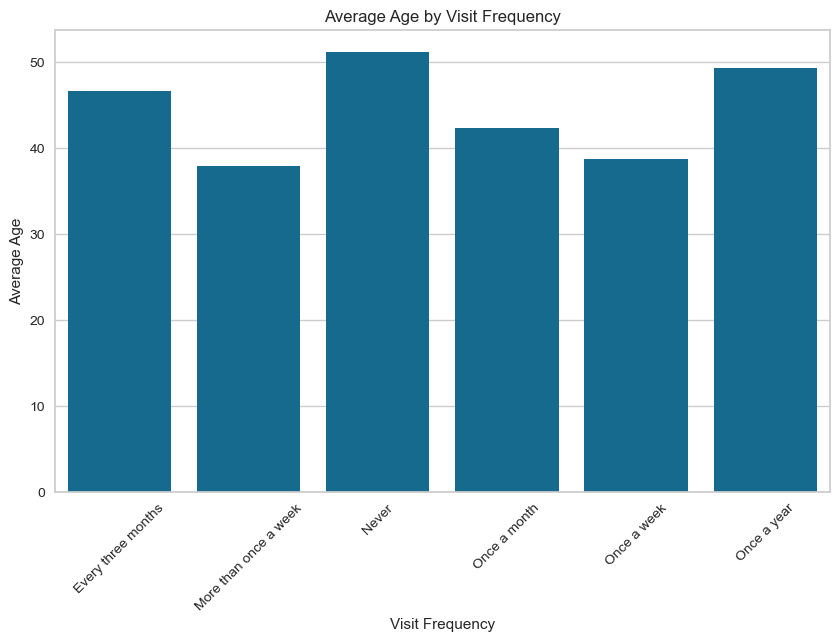

In [344]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=bc.index, y=bc['Age'])  
plt.title('Average Age by Visit Frequency') 
plt.xlabel('Visit Frequency') 
plt.ylabel('Average Age')  
plt.xticks(rotation=45)  
plt.show()  

In [354]:
b=df.groupby('VisitFrequency').agg({'Like':'max'})

In [356]:
b

,Like
VisitFrequency,
Every three months,I love it!+5
More than once a week,I love it!+5
Never,I love it!+5
Once a month,I love it!+5
Once a week,I love it!+5
Once a year,I love it!+5


In [358]:
a=df.groupby('VisitFrequency').agg({'Like':'min'})

In [360]:
a

,Like
VisitFrequency,
Every three months,+1
More than once a week,+3
Never,+1
Once a month,+1
Once a week,+1
Once a year,+1


# average age choose spicy and tasty 
m=df.groupby(['spicy','tasty']).agg({'Age':'mean'})

In [363]:
m

Age
spicy tasty           
No    No     47.790021
      Yes    41.720096
Yes   No     55.500000
      Yes    49.480000

In [365]:
df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female


# how many male and female buy expensive thing

In [368]:
n=df.groupby(['expensive','Gender']).agg({'Gender':'count','Gender':'count'})

In [370]:
n

Gender
expensive Gender        
No        Female     556
          Male       377
Yes       Female     232
          Male       288

# average age group choose healthy or not

In [373]:
o=df.groupby('healthy').agg({'Age':'mean'})

In [375]:
o

,Age
healthy,
No,44.453608
Yes,45.214533


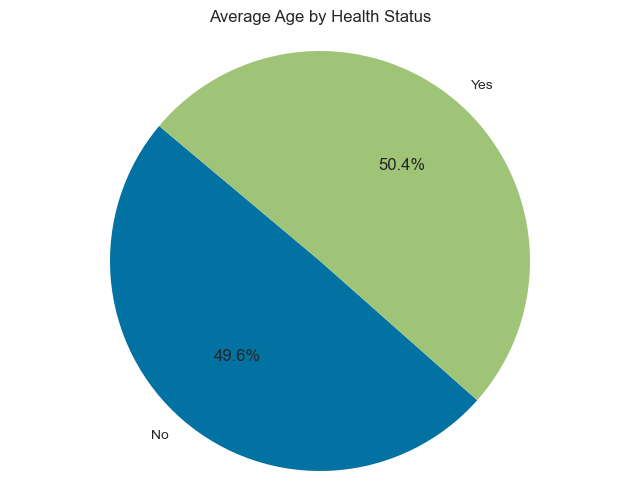

In [377]:
plt.figure(figsize=(8, 6)) 
plt.pie(o['Age'], labels=o.index, autopct='%1.1f%%', startangle=140)  
plt.title('Average Age by Health Status')  
plt.axis('equal')  
plt.show()  

In [381]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [383]:

df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [385]:
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [387]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [389]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [391]:
loadings = pca.components_ 
num_pc = pca.n_components_   
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)] 
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))  
loadings_df['feature'] = df_encoded.columns.values  
loadings_df = loadings_df.set_index('feature')  
loadings_df  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


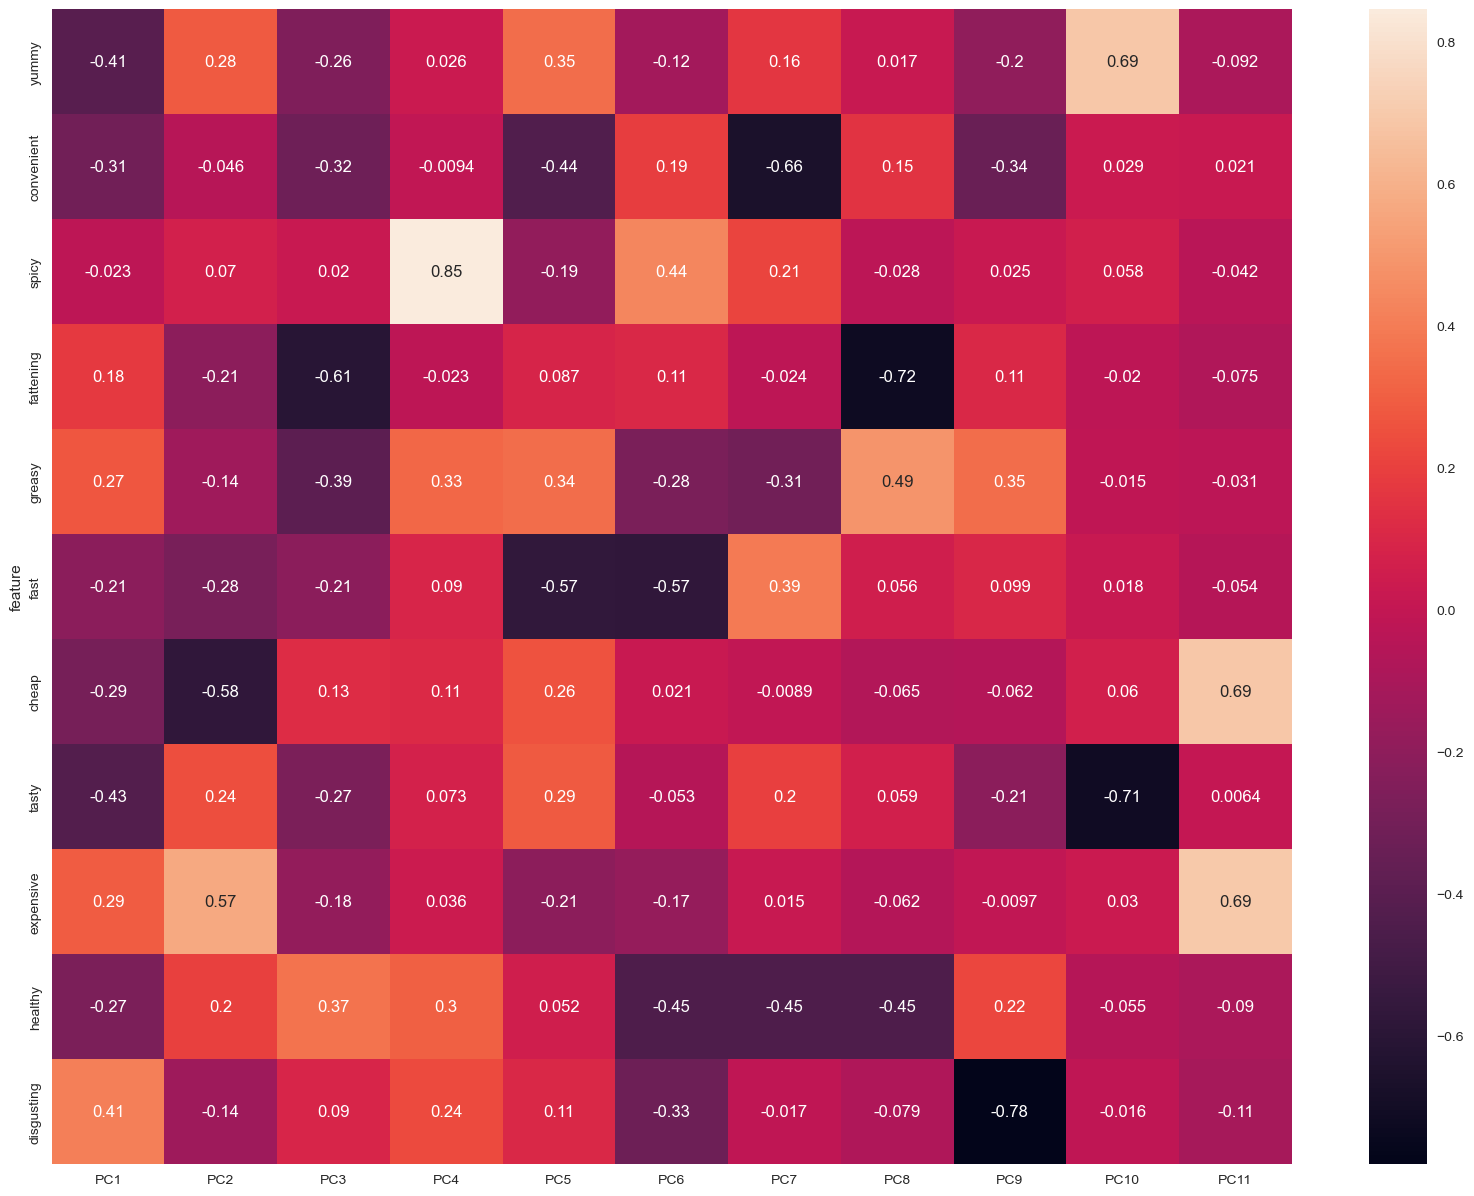

In [393]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()
     

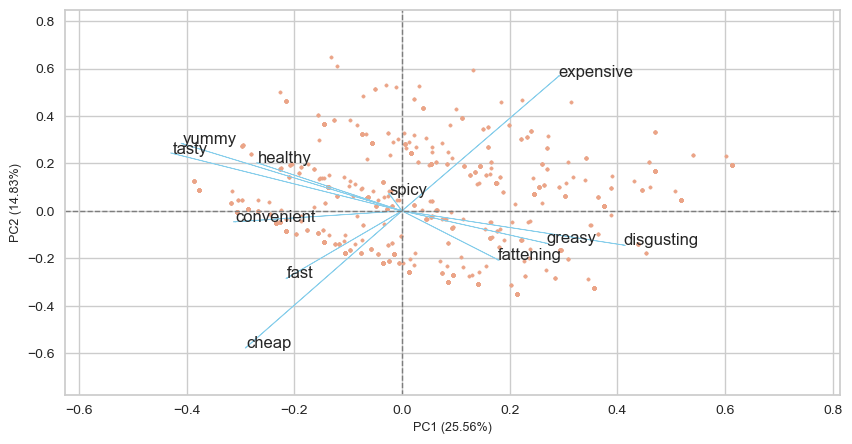

In [394]:
pca_scores = PCA().fit_transform(pca_data)


cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

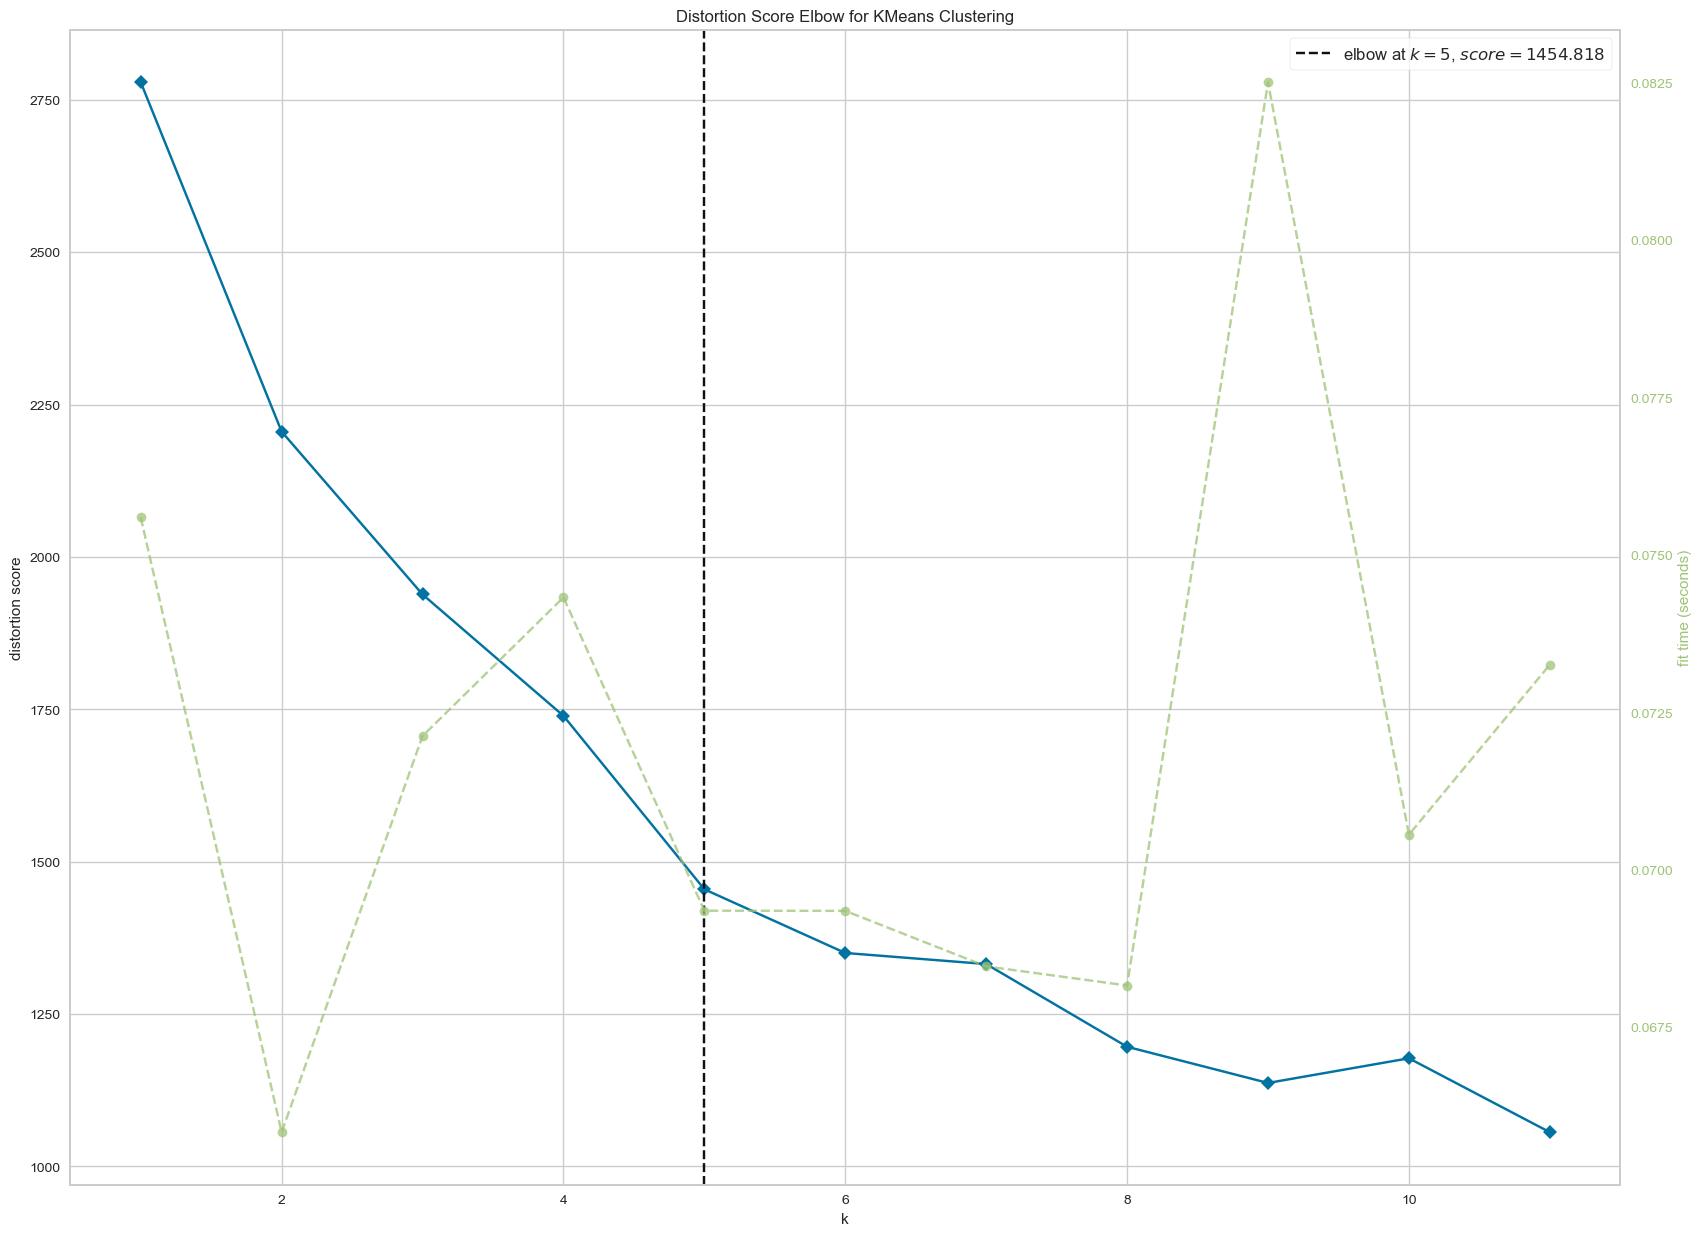

In [395]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();
     

In [398]:
wcss = []  
range_n_clusters = range(1, 11) 

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

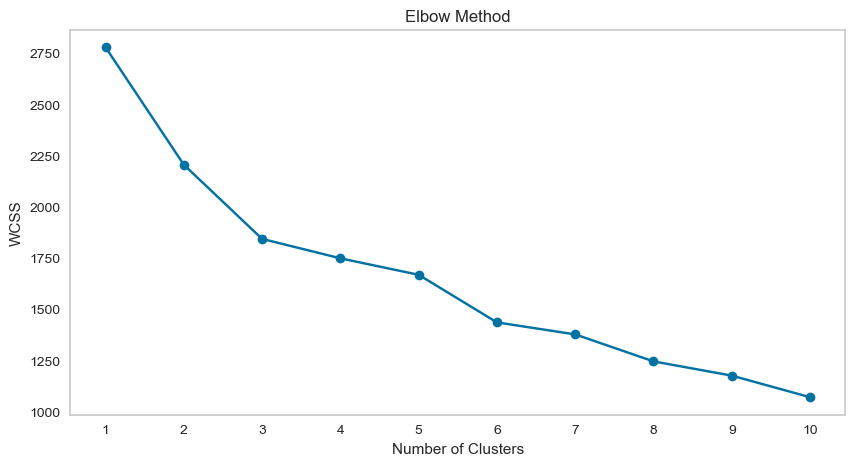

In [399]:
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [400]:
silhouette_scores = []

for n in range(2, 11):  
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
    kmeans.fit(df_encoded)
    score = silhouette_score(df_encoded, kmeans.labels_)
    silhouette_scores.append(score)

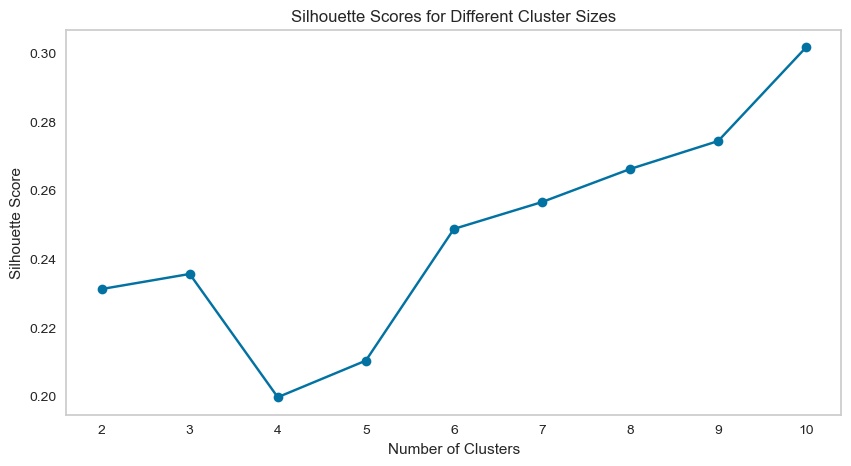

In [402]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [403]:
optimal_clusters = 4  
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans_final.labels_

In [406]:
print('Labels:', kmeans_final.labels_)
print('WCSS:', kmeans_final.inertia_)
print('No. of iterations:', kmeans_final.n_iter_)
print('Cluster centroids:', kmeans_final.cluster_centers_)
print('Cluster size:', Counter(kmeans_final.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158007
No. of iterations: 9
Cluster centroids: [[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -9.99200722e-16
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 0.00000000e+00  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]
Cluster size: Counter({3: 553, 1: 473, 0: 296, 2: 131})


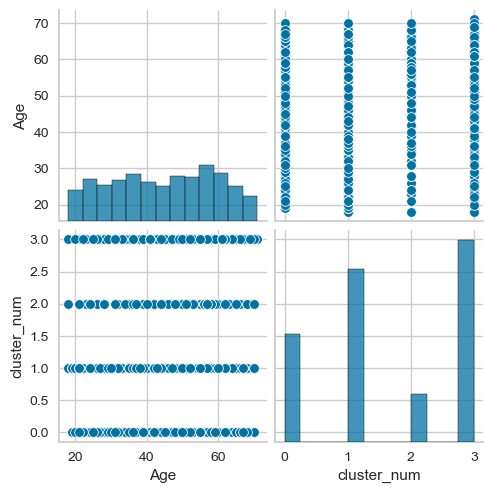

In [415]:
sns.pairplot(data=df)